In [1]:
# pip install seaborn
# pip install pandas
# pip install lestpy

In [2]:
import seaborn as sns
import pandas as pd
from lestpy import lbm_model as lp

# 1. Les données

## 1.1 Import des données

In [3]:
df = sns.load_dataset('iris')
#df = pd.read_csv('C:/Users/TTfr/Documents/Python/formation_python/iris.csv')

## 1.2 Visualisation rapide des données

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#sns.pairplot(df, hue='species', palette='viridis')

In [7]:
for num, species in enumerate(df.species.unique()):
    df['species'][df['species'] == species] = num
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
y = df.pop('species')
X = df

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
func = lambda x,y : x*y
interact = lp.InteractionBuilder('experiment', func)

['X_xor_Y', 'X_or_Y', 'X_or_not_Y', 'X_and_Y', 'X_and_not_Y', 'X_if_Y', 'X_if_not_Y', 'X_if_Y_average', 'X_average_if_Y', 'X_average_if_not_Y', 'Neither_X_nor_Y_extreme', 'both_X_Y_average', 'X_like_Y', 'Sum_X_Y', 'Difference_X_Y', 'experiment']


# 2. Modele

In [11]:
model = lp.LBM_Regression()

In [12]:
model.transform(X, y)

method = variable instant
calculated in 0.384 seconds


In [13]:
model.fit()

summary of the model for species:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     421.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.16e-91
Time:                        21:48:42   Log-Likelihood:                 48.679
No. Observations:                 150   AIC:                            -81.36
Df Residuals:                     142   BIC:                            -57.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [14]:
model.print_model()

model for target "species"
The value of species is high if:
   Coefficient                                     Parameter  Std Error
0        2.564      Sum of petal_length and petal_width high      1.921
1       -3.021  sepal_width + petal_width or not petal_width      0.647
2       -5.079     both petal_length and petal_width average      0.771
3       -2.740                  sepal_length and petal_width      0.751
4        9.157               petal_length if not petal_width      1.965
5       -0.618                  sepal_length xor sepal_width      0.216
6       -0.889           petal_length if petal_width average      0.353





In [15]:
graf = lp.Display(model)

Fitting score for target "species"
                R²  adj-R²  calc-Q²
model score  0.954   0.952    0.949


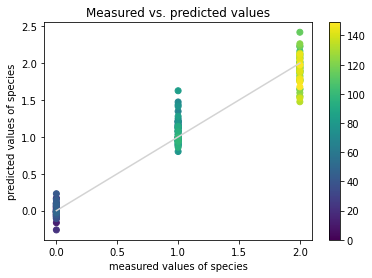

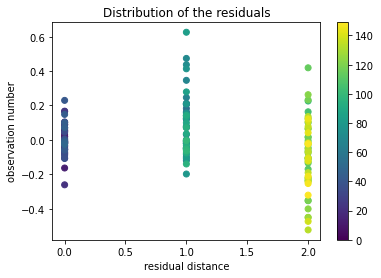

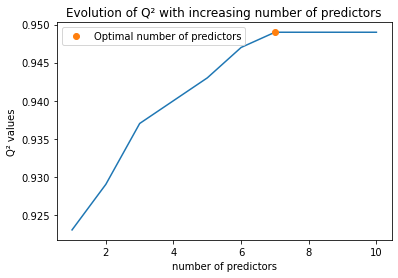

In [16]:
graf.describe(X, y)

In [17]:
experimental_domain, mix = model.features_analysis(X)
experimental_domain

{'sepal_length': [None, 4.3, 7.9, None, 'continuous'],
 'sepal_width': [None, 2.0, 4.4, None, 'continuous'],
 'petal_length': [None, 1.0, 6.9, None, 'continuous'],
 'petal_width': [None, 0.1, 2.5, None, 'continuous']}

Sensitivity analysis for response species


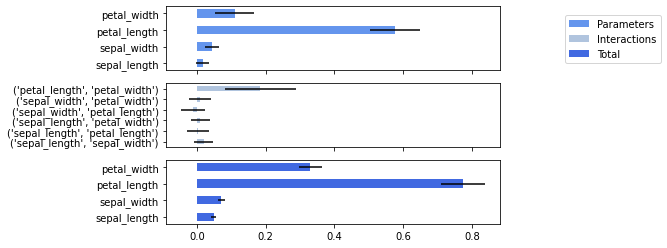

In [18]:
graf.sensibility_analysis(experimental_domain)

In [19]:
res = model.optimize(target={'species': 'minimize'}, size=100000)

size = 100000
              Mean of the 5 best results  Best result
sepal_length                       6.459        7.778
sepal_width                        3.002        2.137
petal_length                       1.098        1.077
petal_width                        0.139        0.111
Predspecies                       -0.432       -0.465
desirability                       0.993        1.000


In [20]:
columns = ["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]
values = [[ 5.1, 3.5, 1.4, 0.2], [5.9, 3.0, 5.1,1.8]]
z = pd.DataFrame(values, columns = columns)
z

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,5.9,3.0,5.1,1.8


In [21]:
model.predict(z)

,Predspecies
0,-0.052820
1,1.678726


In [22]:
OL = lp.Outliers_Inspection(model)

<!> in development <!>
threshold (4/n) = 0.027
potential outliers : [(41, 0.05748404333097631), (68, 0.03625760688617214), (70, 0.042996674519049066), (83, 0.04067625216808658), (100, 0.03785510449429977), (106, 0.028150725474684005), (114, 0.11099831069493217), (118, 0.06591842780896162), (119, 0.028800407125208396), (122, 0.04402484376882201), (129, 0.02716196312107661), (133, 0.030640511117636098), (134, 0.03987005927541148)]


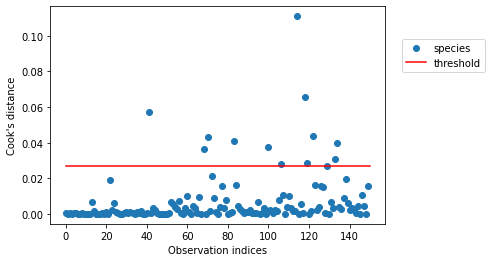

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.000     -0.053      0.000      0.297      0.023      0.046      0.296      0.045
         1      0.000      0.021      0.000     -0.120      0.030     -0.021     -0.120     -0.021
         2      0.000     -0.056      0.000      0.317      0.026      0.051      0.316      0.051
         3      0.000      0.047      0.000     -0.265      0.024     -0.041     -0.264     -0.041
         4      0.000     -0.074      0.001      0.419      0.027      0.071      0.418      0.070
         5      0.000      0.055      0.000     -0.309      0.030     -0.055     -0.308     -0.054
         6      0.000     -0.019      0.000      0.108      0.026      0.017      0.108      0.017
         7

In [25]:
OL.cooks_distance()

<!> in development <!>


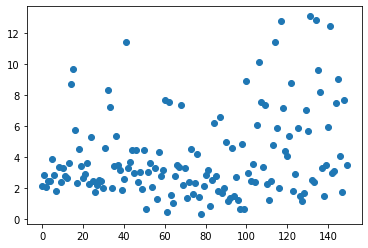

In [24]:
OL.mahalanobis_distance()